Example of Euler's method
---
<div>
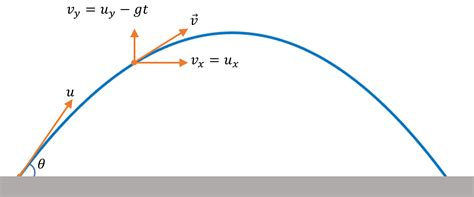
</div>

This example supersedes the starter code described in the README.md file 

In [50]:
vinit = 10 # m/s
theta0 = 45 # degrees
dt = 0.01 # seconds

In [51]:
print("Simulating projectile motion with params:")
print("(vinit,theta0,dt)=(%7.2lf,%7.2f,%7.2f)" % (vinit,theta0,dt))

Simulating projectile motion with params:
(vinit,theta0,dt)=(  10.00,  45.00,   0.01)


In [52]:
from matplotlib import pyplot as plt
from math import sin,cos,pi
import numpy as np

In [53]:
# initial coordinate values: position and velocity 
#  x y          vx                         vy
y0=[0.,0.,vinit*cos(theta0*pi/180),vinit*sin(theta0*pi/180)]
# acceleration due to gravity
g=9.81  # m/s^2

In [54]:
# the functions = derivatives of the coortinates wrt t
def f0(t,y):
    return y[2]  # v_x
def f1(t,y):
    return y[3]  # v_y
def f2(t,y):
    return 0     # acceleration in x
def f3(t,y):
    return -g    # acceleration in y

In [55]:
t=[0]   # keep track of steps in time
y=y0[:] # copy the starting coordinates
trajectory=np.asarray([y0]) # store trajectory

In [56]:
# propagate our projectile
while y[1]>=0:
    y[0]= y[0]+f0(t[-1],y)*dt
    y[1]= y[1]+f1(t[-1],y)*dt
    y[2]= y[2]+f2(t[-1],y)*dt
    y[3]= y[3]+f3(t[-1],y)*dt
    t.append(t[-1]+dt)
    trajectory=np.append(trajectory,[y],axis=0)

In [57]:
# get trajectories for each coordinate
sx = trajectory[:,0] 
sy = trajectory[:,1]
vx = trajectory[:,2]
vy = trajectory[:,3]

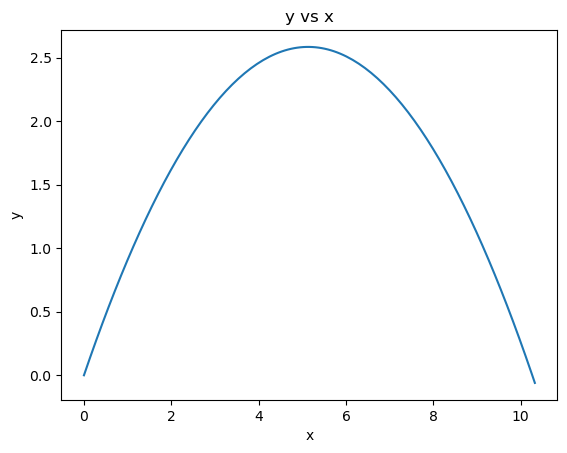

In [58]:
plt.plot(sx, sy)
plt.title("y vs x"),plt.xlabel("x"),plt.ylabel("y");

Study and assess the performance of the Euler algorithm, you can do this in a variety of ways, for example:

* Observe the calculated landing location versus the time step (similarly the error wrt the analytic solution).
* Can you find a time step where the landing location is a “pretty good” match to the expected position?
* Is this observation stable with changes to the initial conditions?
* Plot the difference in x and y position (or velocity) versus time compared to the analytic solution
* Plot the energy of the projectile versus time
* …


In [59]:
# analytic solution
t_analytic = np.linspace(0, 2*vinit*sin(theta0*pi/180)/g, 1000)
sx_exact = vinit * cos(theta0*pi/180) * t_analytic
sy_exact = vinit * sin(theta0*pi/180) * t_analytic - 0.5*g*t_analytic**2


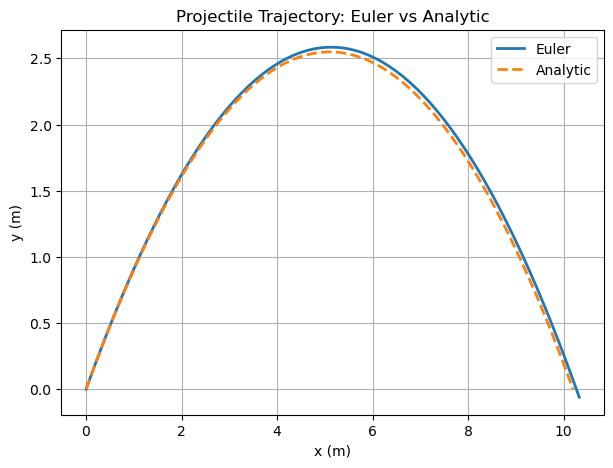

In [60]:
plt.figure(figsize=(7,5))
plt.plot(sx, sy, label="Euler", linewidth=2)
plt.plot(sx_exact, sy_exact, '--', label="Analytic", linewidth=2)
plt.title("Projectile Trajectory: Euler vs Analytic")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.grid()
plt.show()


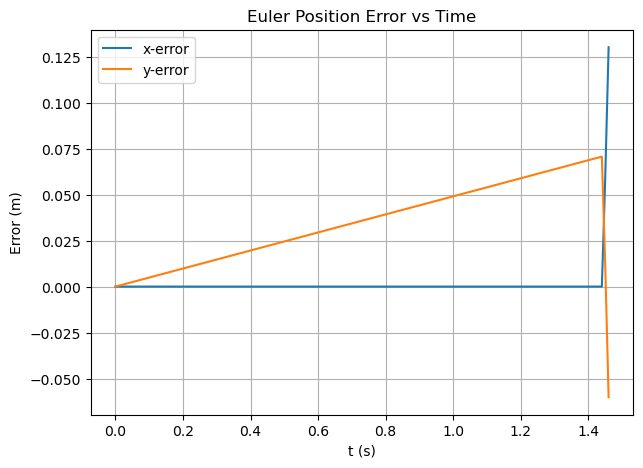

In [61]:
# trim analytic solution to same length as Euler
t_e = np.array(t)
sx_e = sx
sy_e = sy

sx_exact_interp = np.interp(t_e, t_analytic, sx_exact)
sy_exact_interp = np.interp(t_e, t_analytic, sy_exact)

err_x = sx_e - sx_exact_interp
err_y = sy_e - sy_exact_interp

plt.figure(figsize=(7,5))
plt.plot(t_e, err_x, label="x-error")
plt.plot(t_e, err_y, label="y-error")
plt.title("Euler Position Error vs Time")
plt.xlabel("t (s)")
plt.ylabel("Error (m)")
plt.grid()
plt.legend()
plt.show()


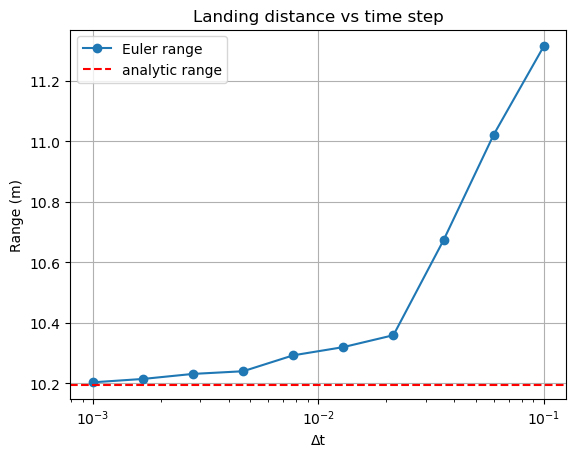

In [62]:
def landing_range(dt):
    y=[0.,0.,vinit*cos(theta0*pi/180),vinit*sin(theta0*pi/180)]
    t=0
    while y[1] >= 0:
        y[0]+= y[2]*dt
        y[1]+= y[3]*dt
        y[3]+= -g*dt
        t+=dt
    return y[0]

dts = np.logspace(-3, -1, 10)
ranges = [landing_range(dt) for dt in dts]
range_exact = vinit**2 * sin(2*theta0*pi/180)/g

plt.semilogx(dts, ranges, 'o-', label="Euler range")
plt.axhline(range_exact, color='r', linestyle='--', label="analytic range")
plt.xlabel("Δt")
plt.ylabel("Range (m)")
plt.title("Landing distance vs time step")
plt.legend()
plt.grid()
plt.show()


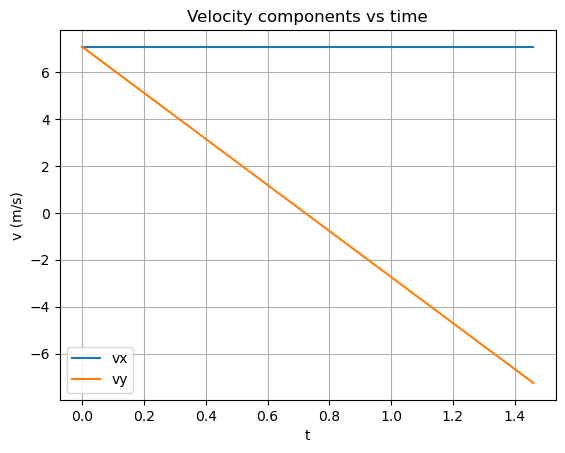

In [63]:
plt.plot(t, vx, label="vx")
plt.plot(t, vy, label="vy")
plt.title("Velocity components vs time")
plt.xlabel("t")
plt.ylabel("v (m/s)")
plt.legend()
plt.grid()
plt.show()


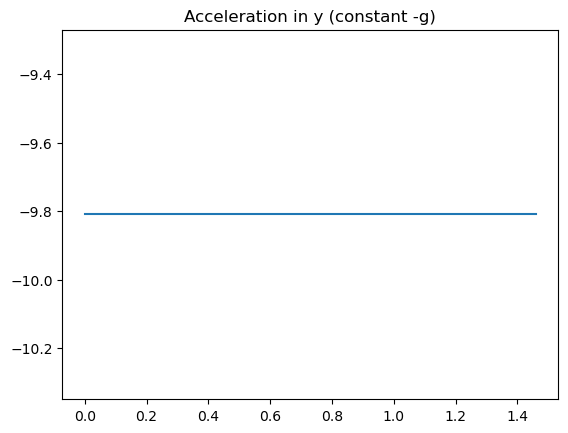

In [64]:
ay = np.full_like(t, -g)
plt.plot(t, ay)
plt.title("Acceleration in y (constant -g)")
plt.show()


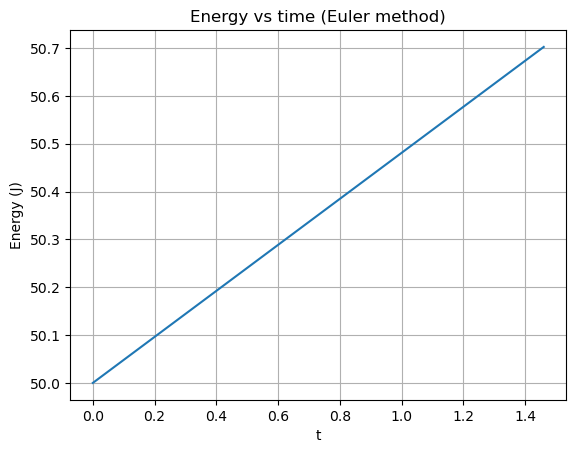

In [65]:
E = 0.5*(vx**2 + vy**2) + g*sy

plt.plot(t, E)
plt.title("Energy vs time (Euler method)")
plt.xlabel("t")
plt.ylabel("Energy (J)")
plt.grid()
plt.show()


Using Euler’s method to simulate projectile motion, I found that the numerical trajectory becomes more accurate when the timestep is reduced. With a larger timestep (e.g., $\Delta t = 0.01$), the landing position shows noticeable error, but with a smaller timestep such as $\Delta t = 0.001$, the result is much closer to the analytic solution. The position and velocity errors steadily grow with time, which is expected for a first-order method. The total mechanical energy $E = \tfrac12(v_x^2 + v_y^2) + g y$ is not conserved: it increases slowly during the simulation, and this drift becomes smaller when $\Delta t$ is decreased. Overall, Euler’s method works but introduces growing errors and does not conserve energy.